In [4]:
#filter warnings
import warnings
warnings.filterwarnings("ignore")

## TEXT GENERATION TRANSFORMERS

#### USING PIPELINE

In [ ]:
from transformers import pipeline
pipe=pipeline(task="text-generation",model="gpt2")
# help(pipe) to see all the parameters

Device set to use mps:0


In [ ]:
## Test the pipeline with different parameters
output=pipe("I am a big bad",do_sample=False,top_k=50,top_p=0.95,temperature=0.1)
print("NO SAMPLE + LOW TEMPERATURE :",output[0]['generated_text'])
output=pipe("I am a big bad",do_sample=True,top_k=50,top_p=0.95,temperature=0.1)
print("SAMPLE + LOW TEMPERATURE :",output[0]['generated_text'])
output=pipe("I am a big bad",do_sample=True,top_k=50,top_p=0.95,temperature=1.0)
print("NO SAMPLE + HIGH TEMPERATURE :",output[0]['generated_text'])
output=pipe("I am a big bad",do_sample=True,top_k=50,top_p=0.95,temperature=1.0)
print("SAMPLE + HIGH TEMPERATURE :",output[0]['generated_text'])
output=pipe("I am a big bad",do_sample=True,top_p=0.95,temperature=0.1)
print("SAMPLE + LOW TEMPERATURE + NO topK:",output[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


NO SAMPLE + LOW TEMPERATURE : I am a big bad guy. I am a big bad guy. I am a big bad guy. I am a big bad guy. I am a big bad guy. I am a big bad guy. I am a big bad guy. I


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


SAMPLE + LOW TEMPERATURE : I am a big bad guy. I am a big bad guy. I am a big bad guy. I am a big bad guy. I am a big bad guy. I am a big bad guy. I am a big bad guy. I


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


NO SAMPLE + HIGH TEMPERATURE : I am a big bad about the 'c.o. and I believe the world is a better place when every man stands up to the same people and treats everyone equally.' He is absolutely right that we can have our voice heard, but he has


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


SAMPLE + HIGH TEMPERATURE : I am a big bad dude," said the man who'd just become the first female firefighter at Fort Hood.

"There's no one else out there that I can call. Why wouldn't he?" said Michael J. Dolan, a
SAMPLE + LOW TEMPERATURE : I am a big bad guy, and I'm going to do everything I can to make sure that I'm not going to be a bad guy," he said. "I'm going to be a good guy. I'm going to be a good


#### USING PIPELINE COMPONENTS

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = AutoModelForCausalLM.from_pretrained("gpt2")
# help(tokenizer) to see all the parameters
# help(model) to see all the parameters

In [30]:
input="Hello, I'm a language model"
print("INPUT TEXT",input)
input_ids=tokenizer(input, return_tensors="pt").input_ids
print("INPUT TOKEN IDS",input_ids)
for ip_id in input_ids[0]:
    print("ID",ip_id.item(),"TOKEN",tokenizer.decode(ip_id))

INPUT TEXT Hello, I'm a language model
INPUT TOKEN IDS tensor([[15496,    11,   314,  1101,   257,  3303,  2746]])
ID 15496 TOKEN Hello
ID 11 TOKEN ,
ID 314 TOKEN  I
ID 1101 TOKEN 'm
ID 257 TOKEN  a
ID 3303 TOKEN  language
ID 2746 TOKEN  model


In [67]:
output_ids=model(input_ids)
# print("OUTPUT TOKEN IDS",output_ids.logits)
print("OUTPUT SHAPE",output_ids.logits.shape)
#most probable next tokens for each word
for i in range(output_ids.logits.shape[1]):
    print("| TOKEN ID",input_ids[0][i].item(),"| TOKEN",tokenizer.decode(input_ids[0][i]),\
        "| MOST PROBABLE NEXT TOKEN ID", output_ids.logits[0][i].argmax().item(),\
        "| PROBABILIY",round(output_ids.logits[0][i].softmax(dim=0).max().item(),2)*100,"%",\
        "| MOST PROBABLE NEXT TOKEN",tokenizer.decode(output_ids.logits[0][i].argmax().item()))

OUTPUT SHAPE torch.Size([1, 7, 50257])
| TOKEN ID 15496 | TOKEN Hello | MOST PROBABLE NEXT TOKEN ID 11 | PROBABILIY 10.0 % | MOST PROBABLE NEXT TOKEN ,
| TOKEN ID 11 | TOKEN , | MOST PROBABLE NEXT TOKEN ID 314 | PROBABILIY 10.0 % | MOST PROBABLE NEXT TOKEN  I
| TOKEN ID 314 | TOKEN  I | MOST PROBABLE NEXT TOKEN ID 1101 | PROBABILIY 19.0 % | MOST PROBABLE NEXT TOKEN 'm
| TOKEN ID 1101 | TOKEN 'm | MOST PROBABLE NEXT TOKEN ID 7926 | PROBABILIY 8.0 % | MOST PROBABLE NEXT TOKEN  sorry
| TOKEN ID 257 | TOKEN  a | MOST PROBABLE NEXT TOKEN ID 1310 | PROBABILIY 5.0 % | MOST PROBABLE NEXT TOKEN  little
| TOKEN ID 3303 | TOKEN  language | MOST PROBABLE NEXT TOKEN ID 5887 | PROBABILIY 10.0 % | MOST PROBABLE NEXT TOKEN  expert
| TOKEN ID 2746 | TOKEN  model | MOST PROBABLE NEXT TOKEN ID 263 | PROBABILIY 33.0 % | MOST PROBABLE NEXT TOKEN er


## TEXT2IMAGE DIFFUSION TRANSFORMERS

#### Breakdown text 2 image pipeline

In [1]:
from diffusers import DiffusionPipeline
pipe = DiffusionPipeline.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5")
# help(pipe) to see all the parameters


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [4]:
import torch
prompt = "Chicken Tikka Masala with rice and poached egg"
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

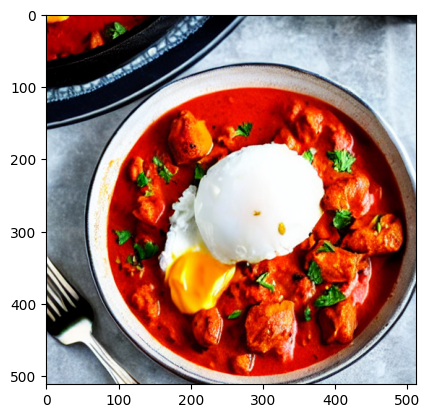

In [5]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [5]:
from diffusers import DiffusionPipeline
pipe = DiffusionPipeline.from_pretrained("Lightricks/LTX-Video")



model_index.json:   0%|          | 0.00/412 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.87G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/418 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/781 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.59k [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/4.19G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/500 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/20.6k [00:00<?, ?B/s]

(…)pytorch_model-00002-of-00002.safetensors:   0%|          | 0.00/2.75G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/501 [00:00<?, ?B/s]

(…)ion_pytorch_model.safetensors.index.json:   0%|          | 0.00/72.1k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

(…)pytorch_model-00001-of-00002.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

ImportError: 
T5Tokenizer requires the SentencePiece library but it was not found in your environment. Checkout the instructions on the
installation page of its repo: https://github.com/google/sentencepiece#installation and follow the ones
that match your environment. Please note that you may need to restart your runtime after installation.


In [3]:
prompt="An indian girl vibing in her room"
output = pipe(prompt=prompt, guidance_scale=1.0, num_inference_steps=1, num_frames=8, height=512, width=512, generator=torch.manual_seed(0))


  0%|          | 0/1 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
export_to_gif(output.frames[0],f"{prompt.replace(' ','_')}.gif")

NameError: name 'export_to_gif' is not defined